In [1]:
import tensorflow as tf
from DeepLearn.tools.loadData import DataSets
from DeepLearn.tools.models import resnet18
from tensorflow.keras import optimizers

**加载cifar100 的残差卷积模型的参数，对测试集进行训练**
1. 重载模型
2. 加载参数
3. 预测以及可视化展示


In [2]:
batch_size = 30
# loadData
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
dataset=DataSets()
train_data, val_data, test_data = dataset.load_data(dataset_name="cifar10", batch_size=30,classes=len(classes))
sample = next(iter(test_data))
print(sample[0].shape,sample[1].shape)

(30, 32, 32, 3) (30, 10)


In [3]:
model_dir=r'E:\pythonProject\DeepLearning\resources\models\cifar100\cifar100_resnet'
network=resnet18(len(classes))
network.build((None,32,32,3))
network.summary()

network.load_weights(model_dir).expect_partial()
network.compile(optimizer=optimizers.Adam(lr=0.001),
                loss=tf.losses.CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

network.evaluate(test_data)

Model: "res_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 16, 16, 64)        2048      
_________________________________________________________________
sequential_1 (Sequential)    (None, 16, 16, 64)        148736    
_________________________________________________________________
sequential_2 (Sequential)    (None, 8, 8, 128)         592512    
_________________________________________________________________
sequential_4 (Sequential)    (None, 4, 4, 256)         2364672   
_________________________________________________________________
sequential_6 (Sequential)    (None, 2, 2, 512)         9447936   
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  2049

[1.974331021308899, 0.6413999795913696]

tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)


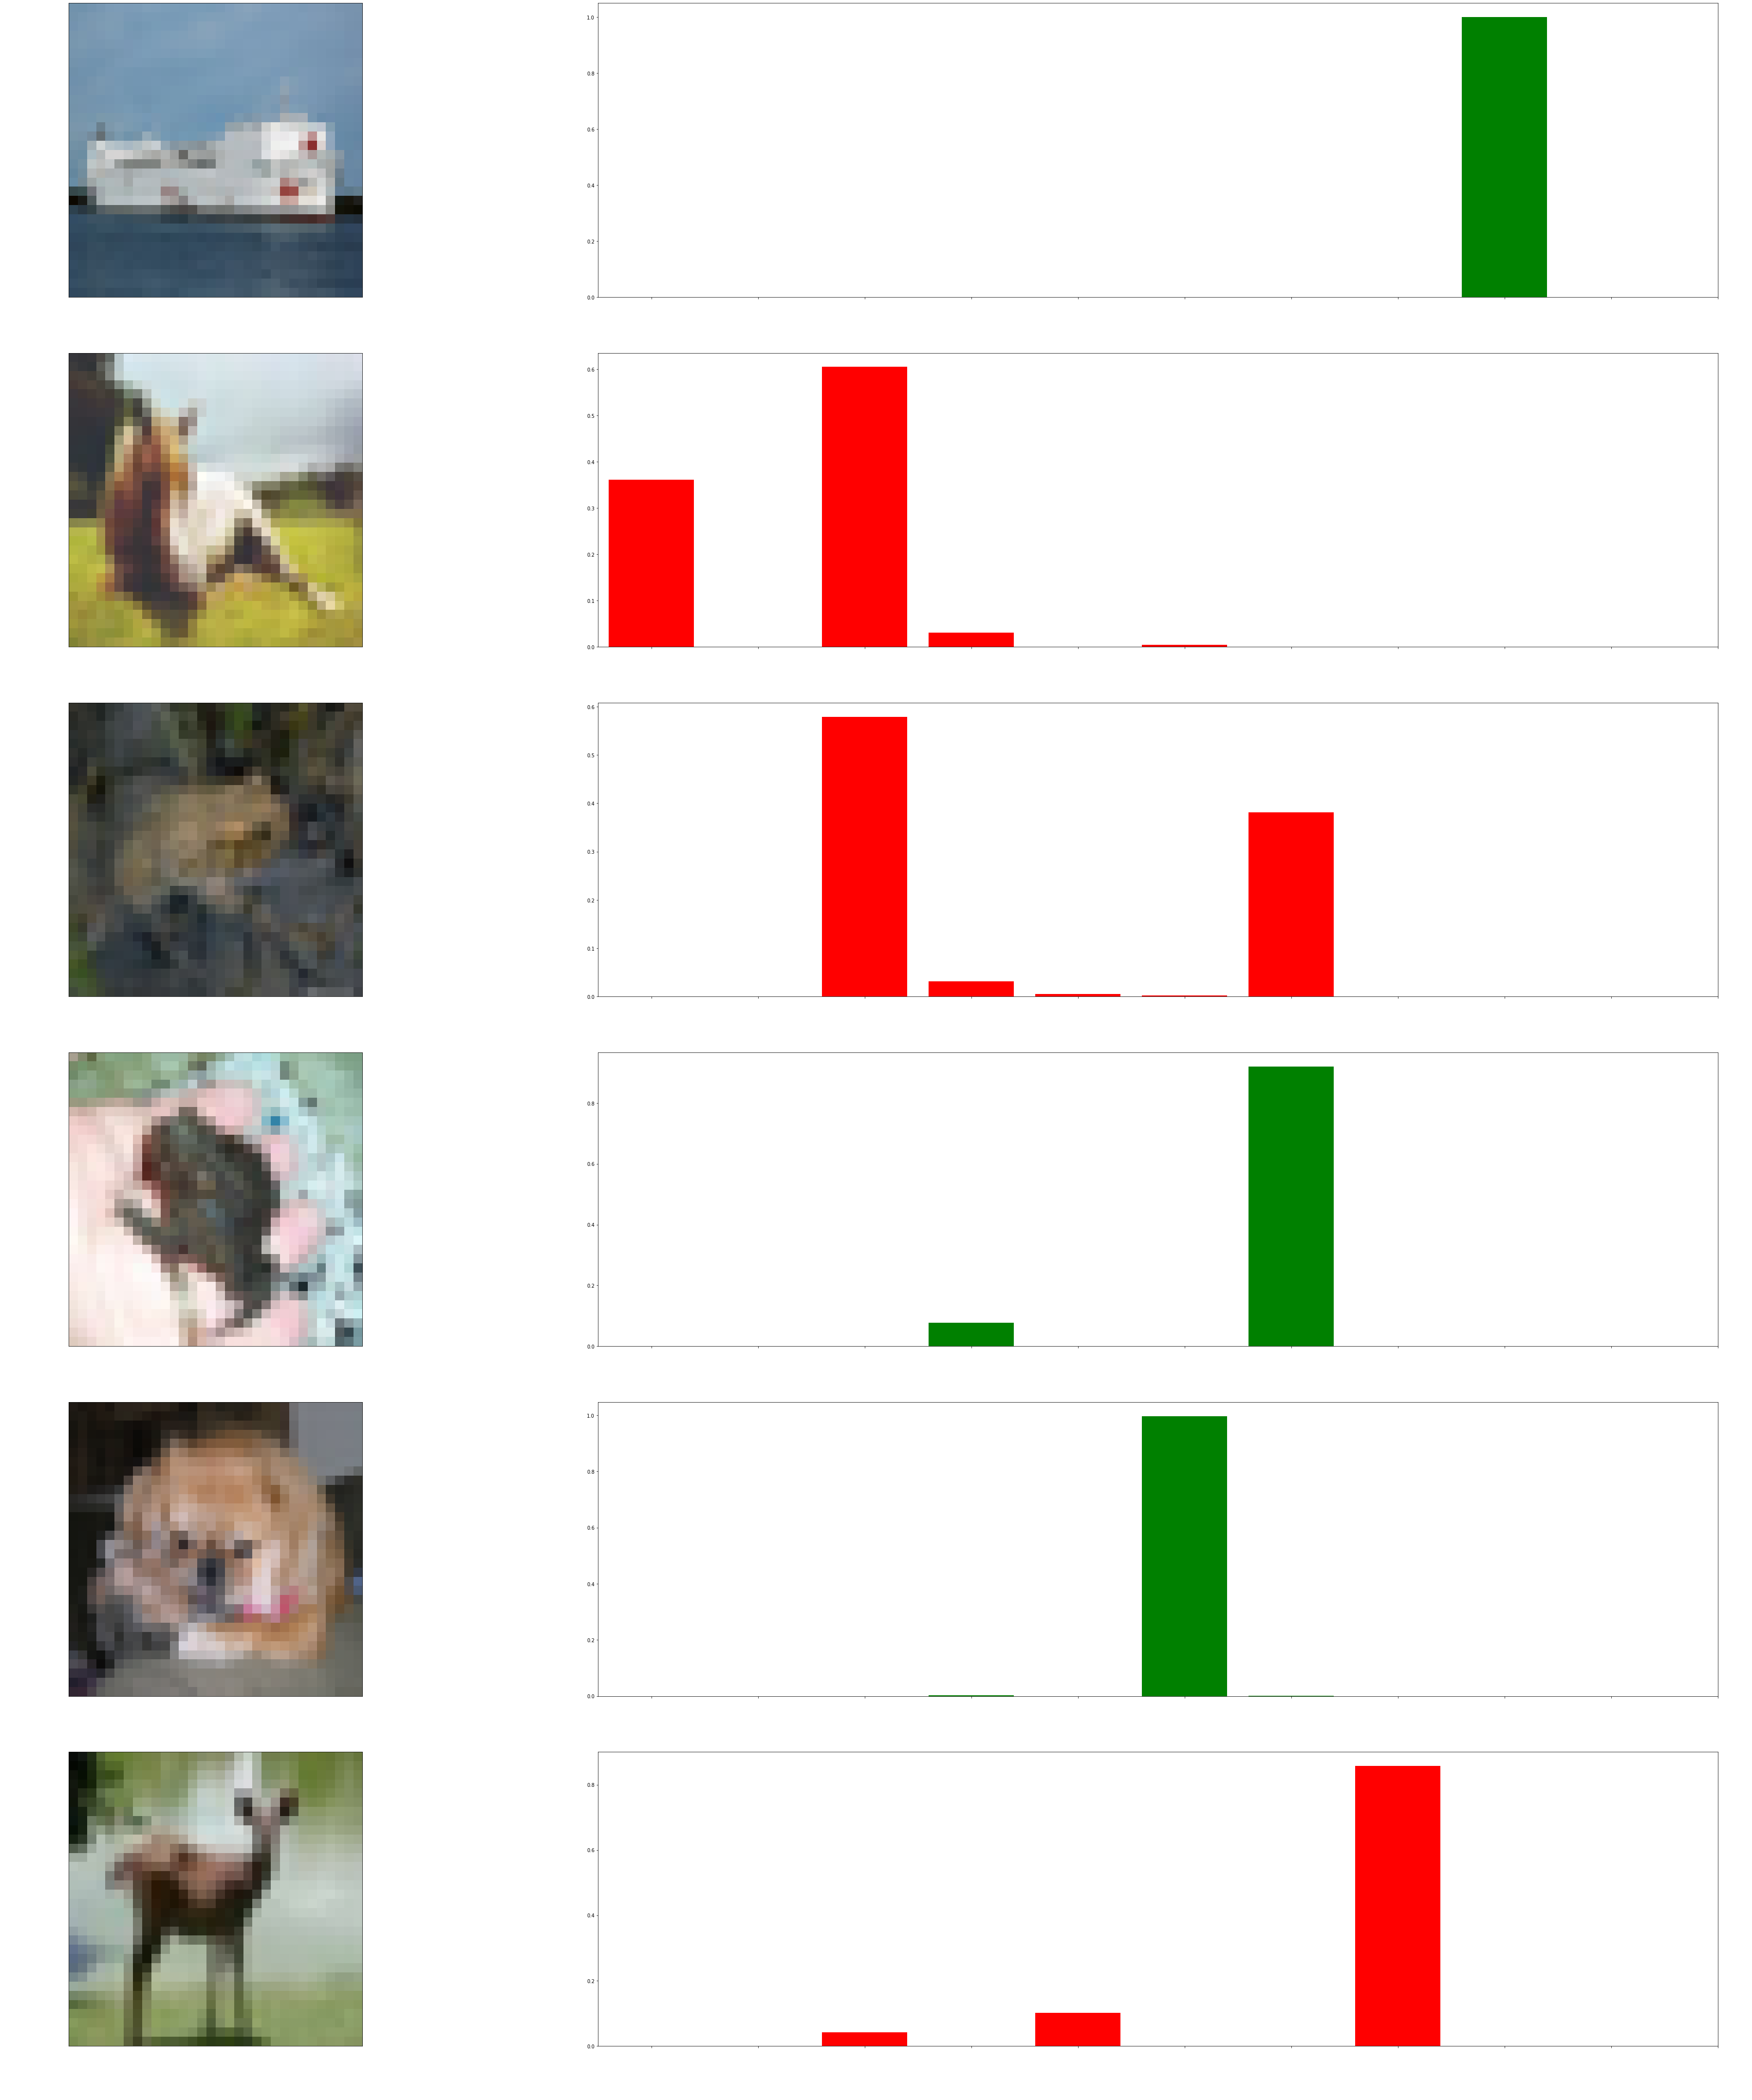

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np

x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(0.1)
plt.figure(figsize=(60,60))
for i in range(6):

    img = sample[0][i]
    img_expand = tf.expand_dims(img,axis=0)
    prob=network(img_expand)
    pre=tf.nn.softmax(prob)
    pre_label=tf.cast(tf.argmax(pre,axis=1),dtype=tf.int64)
    tru_label=tf.argmax(sample[1][i])
    if pre_label == tru_label:
        color='green'
    else:
        color='red'
    # print(color)
    print(tru_label)
    plt.subplots_adjust(left=0.04, top= 2, right = 0.96, bottom = 0.4, wspace = 0.05, hspace = 0.01)
    plt.subplot(6,2,2*i+1),plt.imshow(img,cmap='gray')
    plt.xticks([]),plt.yticks([]),plt.xlabel('{} {:2.0f}% ({})'.format(classes[int(pre_label)],
                                                                       100*np.max(pre[0]),
                                                                       classes[tru_label]),
                                                                        color='white',size=100)
    plt.subplot(6,2,2*i+2),plt.bar(range(10),pre[0],color=color)
    ax2=plt.gca()
    ax2.xaxis.set_major_locator(x_major_locator)
    plt.xlim((-0.5,10))
    ax2.tick_params(axis='x', labelcolor='white',labelsize=100)
    plt.tight_layout()